In [0]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline 

# 랜덤시드 고정시키기
np.random.seed(5)




In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
!ls

pima-indians-diabetes.csv  sample_data


In [0]:
# 1. 데이터 준비하기
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [0]:
# 2. 데이터셋 생성하기
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

In [0]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:




# 4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
hist=model.fit(x_train, y_train, epochs=100, batch_size=64)

# 6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

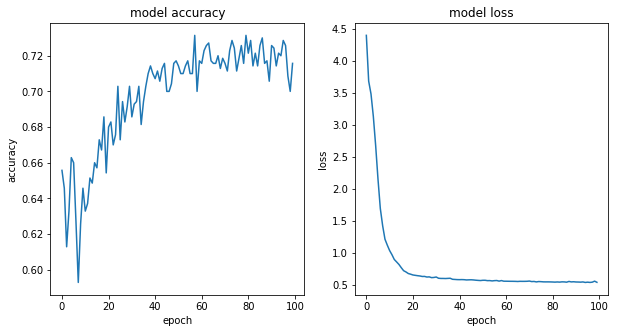

In [0]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

# 모델의 정확도를 그립니다.
ax0.plot(hist.history['acc']) 
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

# 모델의 오차를 그립니다.
ax1.plot(hist.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

In [0]:
# 가상의 환자 데이터 입력
patient_1 = np.array([[0,137,90,35,168,43.1,2.288,33]])

# 모델로 예측하기
prediction = model.predict(patient_1)

# 예측결과 출력하기
print(prediction*100)

[[26.0325]]
